# Linear Algebra (CpE210A)

### Midterms Project

#### Coded and Submitted by:
#### Estocapio, Dean Adrian N.
#### 201813714
#### 58011

In [1]:
## importing of all the libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [2]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


In [3]:
## Reshaping vectors to be used in the code
sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.reshape(np.array(df_prices)[0], (12,1))
costs_mat = np.reshape(np.array(df_prices)[1], (12,1)) 

print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)

(12, 12)
(12, 1)
(12, 1)


In [4]:
## function for the the monthly revenue, costs and profits
def monthly_sales(price, cost, sales): 
    monthly_revenue = np.multiply(sales_mat,prices_mat) ## Solves for Monthly Revenue of all flavors for the year
    monthly_costs = np.multiply(sales_mat,costs_mat) ## Solver for the Costs spent on Each flavor for the year
    monthly_profits = np.subtract(monthly_revenue,monthly_costs) ## Solves for the yearly profits
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [25]:
month_rev, month_costs, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)


print("The Revenues for each month:\n")
print(month_rev)
print("\n=====================================\n")
print("The Costs for each month:\n")
print(month_costs)
print("\n=====================================\n")
print("The Profits for each month:\n")
print(month_profit)

The Revenues for each month:

[ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   8400  14880  14760   3120   6520   1040   1800    880   2160   1640
   8280  18240  39240  15200   6160    560   5880    600   3920   1320
    920   1440  22080  25320  21510  20790  15930   2205   4005      0
     45      0     45    360  15075   9630  17940   6090   1080   2880
  23670    120    150      0    240      0  23670  13740  12960   4920
   1920   1280   2600   2960   3120   1800   3560   4000  25280   9240
  20610  18540   3510   3510   3510    315    135    360     90     45
  14535  25380  35010  26370  29025   4500  444

In [6]:
rev_reshape = np.reshape(month_rev, (12,12)) ## reshaping the vectors for revenue 
costs_reshape = np.reshape(month_costs, (12,12)) ## reshaping the vectors for costs

def flavor_sales(price, cost, sales): ##Function that will solve for the Total Revenue, Costs, and Profits of each flavor 
    flavor_revenue = np.sum(rev_reshape,axis=1).tolist()
    flavor_costs = np.sum(costs_reshape,axis=1).tolist()
    flavor_profits = np.subtract(flavor_revenue,flavor_costs) 
    return flavor_profits.flatten()

In [7]:
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)

print(flavor_profit)

[41370 19040 53260 23715 61245 18387 30660 39820 44790 27615 26156 91770]


In [8]:
## list of the flavors
flavors = ["red velvet", "oreo", "sugar glazed", "almond honey", "matcha", "Strawberry cream",
          "brown sugar boba", "fruits and nuts", "dark chocolate", "chocolate and orange",
          "choco mint", "choco butter naught"] 

best_3_flavors = sorted(zip(flavor_profit,flavors), reverse=True)[0:3]
worst_3_flavors = sorted(zip(flavor_profit,flavors))[0:3]

print("The best 3 flavors in relation to profit:\n", best_3_flavors)
print("\nThe worst 3 flavors in relation to profit\n:", worst_3_flavors)

The best 3 flavors in relation to profit:
 [(91770, 'choco butter naught'), (61245, 'matcha'), (53260, 'sugar glazed')]

The worst 3 flavors in relation to profit
: [(18387, 'Strawberry cream'), (19040, 'oreo'), (23715, 'almond honey')]


# Visualization of the Data

#### Price and Cost Relation for Each Flavor

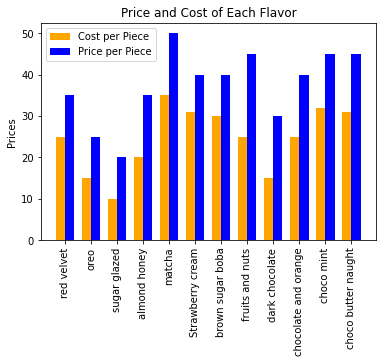

In [26]:
Number_of_flavors = np.arange(12)
width = 0.35

pricelist = tuple(prices_mat.reshape(1,12)[0])
costlist = tuple(costs_mat.reshape(1,12)[0])

plt.bar(ind, costlist, width, label = "Cost per Piece", color="orange")
plt.bar(ind+width, pricelist, width, label = "Price per Piece", color ="blue")

plt.title("Price and Cost of Each Flavor")
plt.ylabel("Prices")
plt.xticks(Number_of_flavors+width/2, flavors, rotation=90)
plt.legend(loc='best')
plt.show()

#### Bar Graph for the Sales of Each Flavor

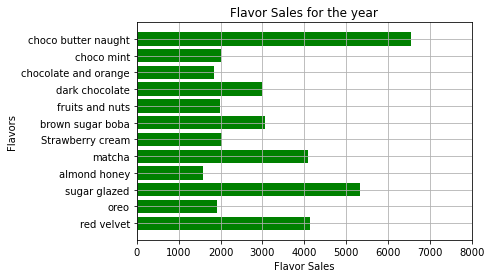

In [22]:
sales_count = np.sum(sales_mat,axis=1).tolist()

sales_pos = [list1 for list1, _ in enumerate(flavors)]

plt.barh(sales_pos, sales_count, color='green')
plt.ylabel("Flavors")
plt.xlabel("Flavor Sales")
plt.title("Flavor Sales for the year")

plt.yticks(sales_pos, flavors)
plt.xticks(np.arange(0,8100,1000))
plt.grid()
plt.show()

#### Bar Graph for the Profit of Each Flavor

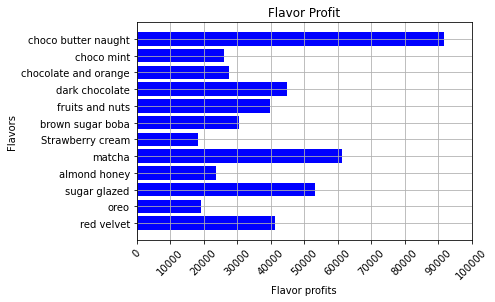

In [68]:
flavors_pos = [list1 for list1, _ in enumerate(flavors)]

plt.barh(flavors_pos, flavor_profit, color='blue')
plt.ylabel("Flavors")
plt.xlabel("Flavor profits")
plt.title("Flavor Profit")

plt.yticks(flavors_pos, flavors)
plt.xticks(np.arange(0,110000,10000), rotation = 45)
plt.grid()
plt.show()

# Part 4: Business Recommendation and Conclusion

Hello Ms. Bebang, shown in the cells above are the data calculations of your monthly sales as well as the sales for each flavor. It seems that your business has been quite successful and profitable throughout the year, of course, this does not account for any of the operating cost required to run your business, since those data were not made available to me. Still it is not hard to believe that your business so far has been a success, although some parts more than others. 

And so looking at the resulting data and analyzing it here is what I would recommend, provided that the cahnges in the data continues as expected. The focus, for now, should be on the flavors that were not as profitable. The first thing to notice here is that the profit made from each flavor is almost the same as the number of sales that it made for the year, and thus there are a few solutions that I would suggest for this situation, the first would be to contact your supplier and see if they have better cheaper deals for the product, thereby costing you less to buy while allowing you to keep the price the same, this will then result in a much higher profit margin which will result in a much higher profit margin.

Another one would be to keep a keen eye on the market and see which ones are selling the most, perhaps perform a survey on what flavors your customers like the best, or what they would like to have added available in your store. Adding new products may also gather the interest of more potential customers.